In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
import os
import zipfile

local_zip = '/content/gdrive/My Drive/Dockship/dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
data_train = '/tmp/CIFAR10/train'
data_test = '/tmp/CIFAR10/test'

In [ ]:
!pip install fastai --upgrade

     |████████████████████████████████| 194kB 4.6MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
from fastai.vision.all import *
from fastai.vision import *
#from fastai.vision.core import *
from fastai.vision.data import *

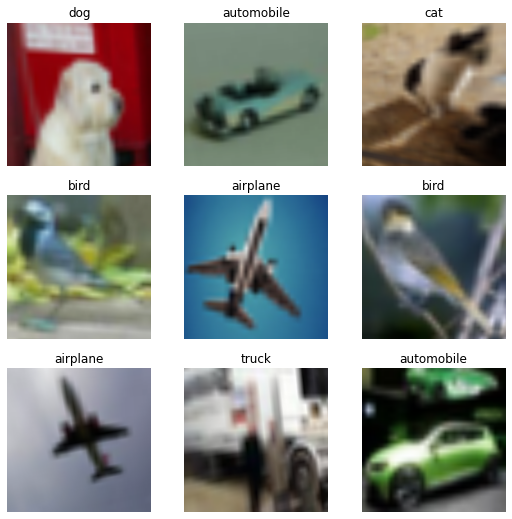

In [ ]:
def label_func(fname):
    #label = str(fname).split(os.path.sep)[-2]
    return str(fname).split(os.path.sep)[-2]
    #return label
dblock = DataBlock(blocks= (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = RandomSplitter(),
                   item_tfms = Resize(224),
                   batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_train)
dls.show_batch()

In [ ]:
learner = cnn_learner(dls,models.resnet50,metrics=accuracy)
learner.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.574072,0.346437,0.881700,05:30


epoch,train_loss,valid_loss,accuracy,time
0,0.292834,0.226503,0.925200,07:26
1,0.245851,0.179952,0.938100,07:24
2,0.152122,0.156802,0.945800,07:18
3,0.070474,0.114877,0.963800,07:25
4,0.039614,0.108663,0.964900,07:21


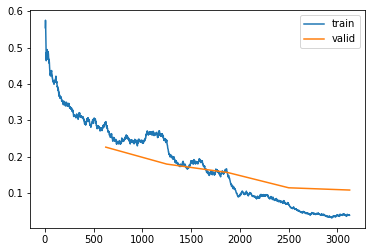

In [ ]:
learner.recorder.plot_loss()

In [ ]:
from imutils import paths
import numpy as np
print("[INFO] loading images...")
imagePaths = list(paths.list_images(data_test))
imagePaths = sorted(imagePaths)
print(imagePaths[:5])

[INFO] loading images...
['/tmp/CIFAR10/test/00001_test.png', '/tmp/CIFAR10/test/00002_test.png', '/tmp/CIFAR10/test/00003_test.png', '/tmp/CIFAR10/test/00004_test.png', '/tmp/CIFAR10/test/00005_test.png']


In [ ]:
name = []
op = []
c= 0
for imagePath in imagePaths:
	img = load_image(imagePath)
	name.append(imagePath.split(os.path.sep)[-1])
	op.append(learner.predict(imagePath)[0])

In [ ]:
import pandas as pd
df = pd.DataFrame(list(zip(name, op)), columns =['filename', 'label']) 
df.head()


,filename,label
0,00001_test.png,dog
1,00002_test.png,deer
2,00003_test.png,frog
3,00004_test.png,dog
4,00005_test.png,horse


In [ ]:
df.to_csv('/content/gdrive/My Drive/Dockship/output3.csv',index=False)